In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('traindata.csv')

In [4]:
test = pd.read_csv('testdata.csv')

In [4]:
train.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


#### Removing paramteres which are not important as per the given question

In [5]:
train = train.drop(['industry_code','occupation_code','household_stat','veterans_admin_questionnaire','mig_year','country_of_birth_own','country_of_birth_father',
             'country_of_birth_mother','migration_code_change_in_msa','migration_prev_sunbelt','migration_code_move_within_reg','migration_code_change_in_reg',
             'old_residence_reg','importance_of_record'],axis=1)

In [6]:
test = test.drop(['industry_code','occupation_code','household_stat','veterans_admin_questionnaire','mig_year','country_of_birth_own','country_of_birth_father',
             'country_of_birth_mother','migration_code_change_in_msa','migration_prev_sunbelt','migration_code_move_within_reg','migration_code_change_in_reg',
             'old_residence_reg','importance_of_record'],axis=1)

#### Checking null values

In [7]:
train.isnull().sum()

ID                            0
age                           0
gender                        0
education                     0
class                    105245
education_institute      196197
marital_status                0
race                          0
is_hispanic                   0
employment_commitment         0
unemployment_reason      202979
employment_stat               0
wage_per_hour                 0
is_labor_union           189420
working_week_per_year         0
industry_code_main            0
occupation_code_main     105694
total_employed                0
household_summary             0
under_18_family          151654
vet_benefit                   0
tax_status                    0
gains                         0
losses                        0
stocks_status                 0
citizenship                   0
residence_1_year_ago     106284
old_residence_state      193148
income_above_limit            0
dtype: int64

In [8]:
test.isnull().sum()

ID                           0
age                          0
gender                       0
education                    0
class                    45079
education_institute      84170
marital_status               0
race                         0
is_hispanic                  0
employment_commitment        0
unemployment_reason      87106
employment_stat              0
wage_per_hour                0
is_labor_union           81322
working_week_per_year        0
industry_code_main           0
occupation_code_main     45273
total_employed               0
household_summary            0
under_18_family          64972
vet_benefit                  0
tax_status                   0
gains                        0
losses                       0
stocks_status                0
citizenship                  0
residence_1_year_ago     45597
old_residence_state      82670
dtype: int64

#### Deleting parameters with too much null values

In [7]:
train=train.drop(['ID','class','education_institute','unemployment_reason','is_labor_union',
            'occupation_code_main','under_18_family','residence_1_year_ago','old_residence_state'],axis=1)
test=test.drop(['ID','class','education_institute','unemployment_reason','is_labor_union',
            'occupation_code_main','under_18_family','residence_1_year_ago','old_residence_state'],axis=1)

In [10]:
train.describe()

,age,employment_stat,wage_per_hour,working_week_per_year,total_employed,vet_benefit,gains,losses,stocks_status
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,1.956067,1.515854,435.926887,36.881737,194.533420
std,22.306738,0.555562,276.757327,24.397963,2.365154,0.850853,4696.359500,270.383302,1956.375501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,50.000000,0.000000,0.000000,52.000000,4.000000,2.000000,0.000000,0.000000,0.000000
max,90.000000,2.000000,9999.000000,52.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   age                    209499 non-null  int64 
 1   gender                 209499 non-null  object
 2   education              209499 non-null  object
 3   marital_status         209499 non-null  object
 4   race                   209499 non-null  object
 5   is_hispanic            209499 non-null  object
 6   employment_commitment  209499 non-null  object
 7   employment_stat        209499 non-null  int64 
 8   wage_per_hour          209499 non-null  int64 
 9   working_week_per_year  209499 non-null  int64 
 10  industry_code_main     209499 non-null  object
 11  total_employed         209499 non-null  int64 
 12  household_summary      209499 non-null  object
 13  vet_benefit            209499 non-null  int64 
 14  tax_status             209499 non-null  object
 15  

#### Checking the significance of remaining categorical parameters

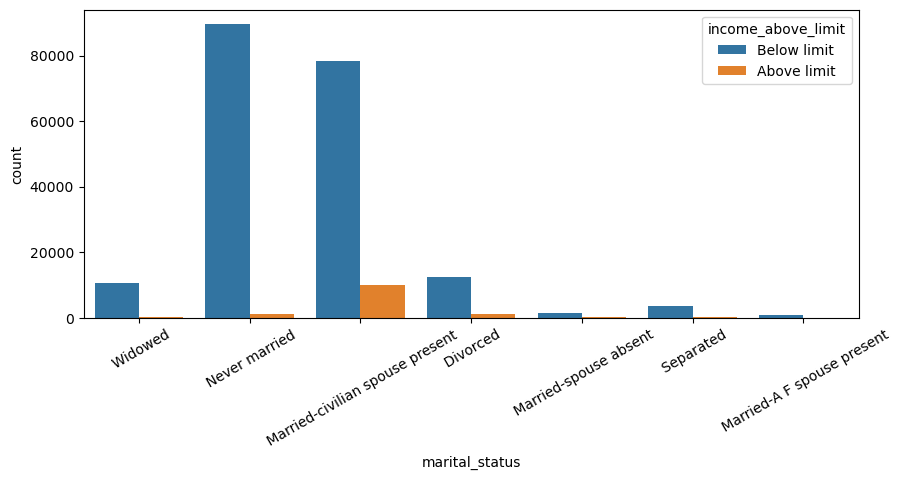

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(x=train.marital_status,hue=train.income_above_limit)
plt.xticks(rotation=30)
plt.show()

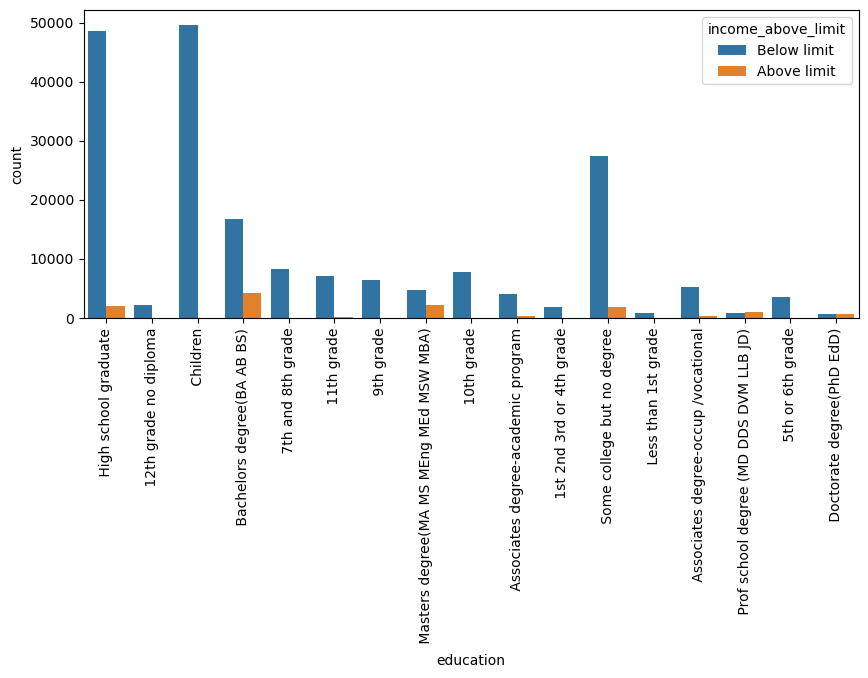

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(x=train.education,hue=train.income_above_limit)
plt.xticks(rotation=90)
plt.show()

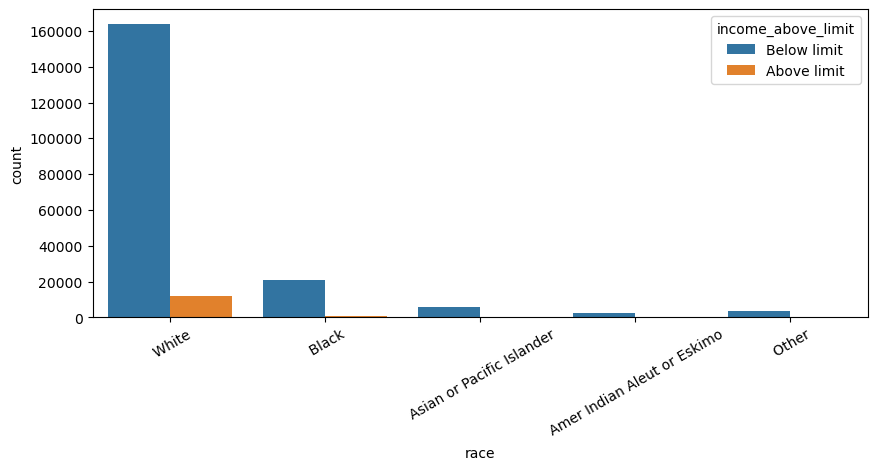

In [14]:
plt.figure(figsize=(10,4))
sns.countplot(x=train.race,hue=train.income_above_limit)
plt.xticks(rotation=30)
plt.show()

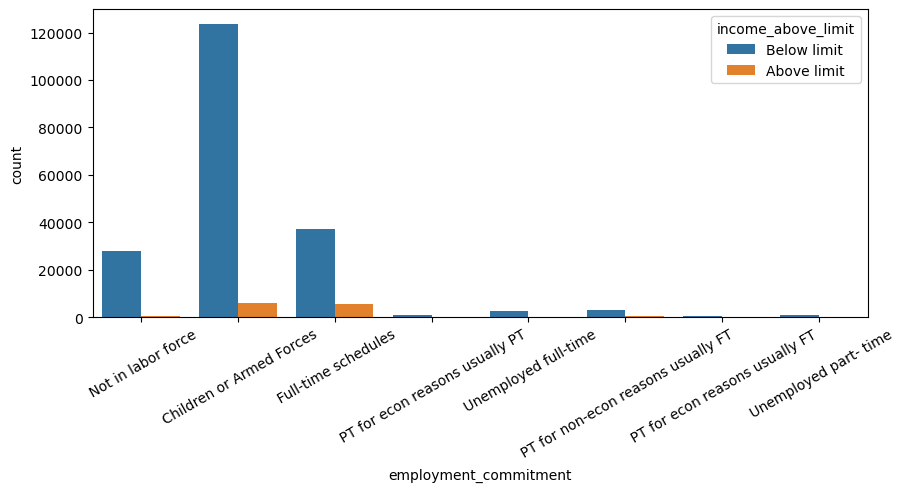

In [15]:
plt.figure(figsize=(10,4))
sns.countplot(x=train.employment_commitment,hue=train.income_above_limit)
plt.xticks(rotation=30)
plt.show()

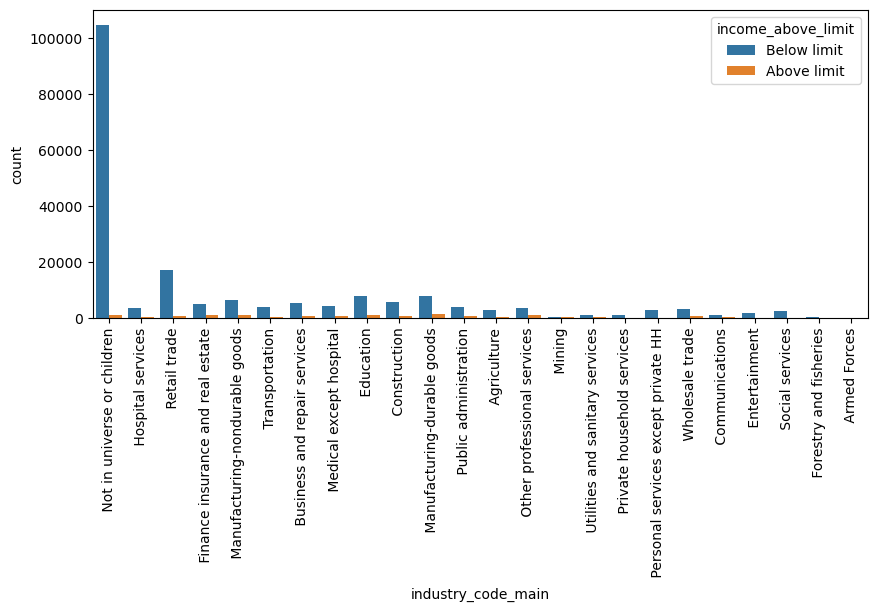

In [16]:
plt.figure(figsize=(10,4))
sns.countplot(x=train.industry_code_main,hue=train.income_above_limit)
plt.xticks(rotation=90)
plt.show()

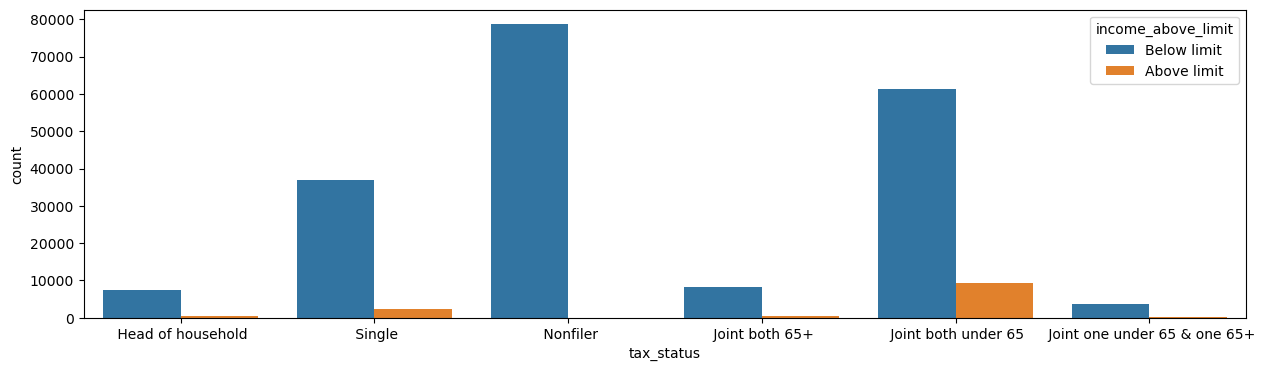

In [17]:
plt.figure(figsize=(15,4))
sns.countplot(x=train.tax_status,hue=train.income_above_limit)
plt.xticks(rotation=0)
plt.show()

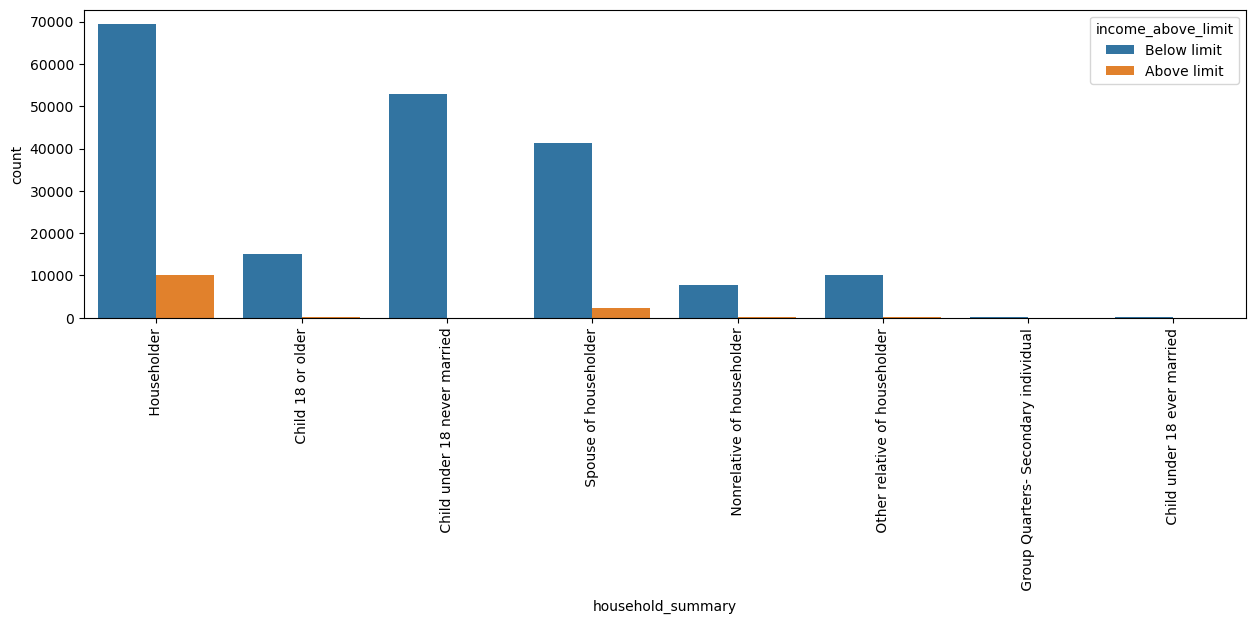

In [18]:
plt.figure(figsize=(15,4))
sns.countplot(x=train.household_summary,hue=train.income_above_limit)
plt.xticks(rotation=90)
plt.show()

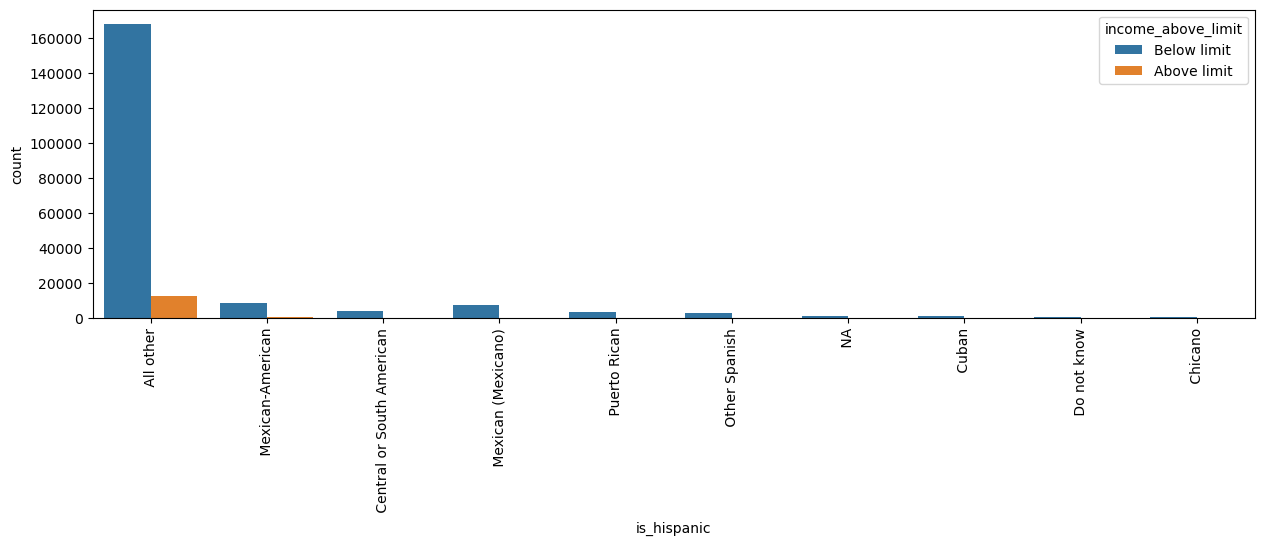

In [19]:
plt.figure(figsize=(15,4))
sns.countplot(x='is_hispanic',hue='income_above_limit',data=train)
plt.xticks(rotation=90)
plt.show()

In [20]:
train.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code_main,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,income_above_limit
0,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,52,Not in universe or children,2,Householder,2,Head of household,0,0,292,Native,Below limit
1,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,0,Not in universe or children,0,Householder,2,Single,0,0,0,Native,Below limit
2,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,15,Hospital services,4,Child 18 or older,2,Single,0,0,0,Native,Below limit
3,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,Not in universe or children,0,Child under 18 never married,0,Nonfiler,0,0,0,Native,Below limit
4,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,Not in universe or children,0,Spouse of householder,2,Joint both 65+,0,0,0,Native,Below limit


### Data Preparation for training

In [8]:
frames = [train, test]
df = pd.concat(frames)

In [9]:
from sklearn.preprocessing import LabelEncoder
x = LabelEncoder()
df['gender']=x.fit_transform(df['gender'])
df['marital_status']=x.fit_transform(df['marital_status'])
df['citizenship']=x.fit_transform(df['citizenship'])
df['household_summary']=x.fit_transform(df['household_summary'])
df['tax_status']=x.fit_transform(df['tax_status'])
df['employment_commitment']=x.fit_transform(df['employment_commitment'])
df['race']=x.fit_transform(df['race'])
df['education']=x.fit_transform(df['education'])
df['is_hispanic']=x.fit_transform(df['is_hispanic'])
df['industry_code_main']=x.fit_transform(df['industry_code_main'])
df.income_above_limit[df.income_above_limit == 'Below limit'] = 0
df.income_above_limit[df.income_above_limit == 'Above limit'] = 1

C:\Users\divya\AppData\Local\Temp\ipykernel_1048\838996598.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.income_above_limit[df.income_above_limit == 'Below limit'] = 0
C:\Users\divya\AppData\Local\Temp\ipykernel_1048\838996598.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.income_above_limit[df.income_above_limit == 'Above limit'] = 1


In [24]:
df.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code_main,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,income_above_limit
0,79,0,12,6,4,0,2,0,0,52,14,2,4,2,0,0,0,292,4,0
1,65,0,12,6,4,0,0,0,0,0,14,0,4,2,5,0,0,0,4,0
2,21,1,2,4,2,0,0,0,500,15,9,4,0,2,5,0,0,0,4,0
3,2,0,10,4,1,0,0,0,0,0,14,0,2,0,4,0,0,0,4,0
4,70,1,12,2,4,0,2,0,0,0,14,0,7,2,1,0,0,0,4,0


In [25]:
df.shape

(299285, 20)

In [10]:
train = df.iloc[:209499,:]
test = df.iloc[209499:,:]
xtrain = train.drop(['income_above_limit'], axis=1)
ytrain = train['income_above_limit']
xtest = test.drop(['income_above_limit'], axis=1)

In [30]:
xtrain.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code_main,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship
0,79,0,12,6,4,0,2,0,0,52,14,2,4,2,0,0,0,292,4
1,65,0,12,6,4,0,0,0,0,0,14,0,4,2,5,0,0,0,4
2,21,1,2,4,2,0,0,0,500,15,9,4,0,2,5,0,0,0,4
3,2,0,10,4,1,0,0,0,0,0,14,0,2,0,4,0,0,0,4
4,70,1,12,2,4,0,2,0,0,0,14,0,7,2,1,0,0,0,4


In [12]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
col= ['age','wage_per_hour','employment_stat','working_week_per_year','total_employed','vet_benefit','gains','losses','stocks_status']
xtrain[col] = s.fit_transform(xtrain[col])
xtest[col] = s.fit_transform(xtest[col])

In [32]:
xtrain.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code_main,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship
0,1.994078,0,12,6,4,0,2,-0.318165,-0.200297,1.182116,14,0.018575,4,0.569014,0,-0.092823,-0.136406,0.049820,4
1,1.366464,0,12,6,4,0,0,-0.318165,-0.200297,-0.949215,14,-0.827038,4,0.569014,5,-0.092823,-0.136406,-0.099436,4
2,-0.606039,1,2,4,2,0,0,-0.318165,1.606344,-0.334408,9,0.864188,0,0.569014,5,-0.092823,-0.136406,-0.099436,4
3,-1.457802,0,10,4,1,0,0,-0.318165,-0.200297,-0.949215,14,-0.827038,2,-1.781576,4,-0.092823,-0.136406,-0.099436,4
4,1.590612,1,12,2,4,0,2,-0.318165,-0.200297,-0.949215,14,-0.827038,7,0.569014,1,-0.092823,-0.136406,-0.099436,4


In [13]:
ytrain=ytrain.astype('int')

### Appyling Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2000)
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=2000)

In [18]:
predictions=rf.predict(xtest)

In [21]:
ytest = pd.read_csv('results.csv')

In [23]:
ytest = ytest.drop(['ID'],axis=1)

In [28]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model:', round(accuracy_score(ytest,predictions)*100,2))

Accuracy of the model: 97.35
